<a href="https://colab.research.google.com/github/cugbo/Dynamic-in-ts-linear-Model/blob/main/Chima_Ugbo_H_W_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
# Parameters
phi = 0.8          # Autoregressive coefficient, |phi| < 1 for stability
sigma = 1          # Standard deviation of white noise
n = 100            # Length of the time series

In [3]:
# Generate white noise
np.random.seed(42)  # For reproducibility
epsilon = np.random.normal(0, sigma, n)

In [4]:
# Initialize time series array
X = np.zeros(n)
X[0] = epsilon[0]   # Start the series

In [23]:
# Generate AR(1) process
for t in range(1, n):
    X[t] = phi * X[t-1] + epsilon[t]

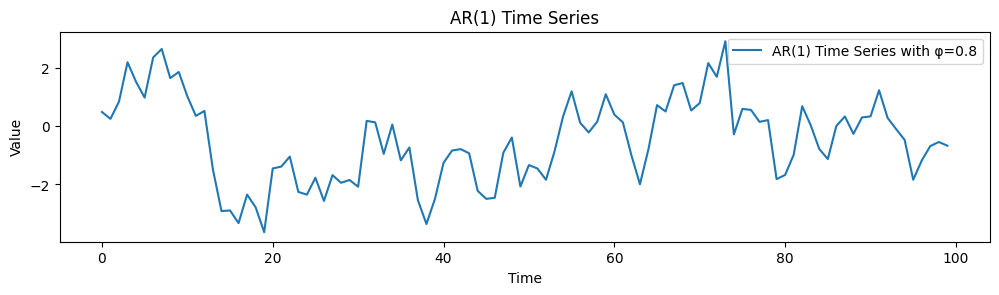

In [12]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X, label=f"AR(1) Time Series with φ={phi}")
plt.title("AR(1) Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

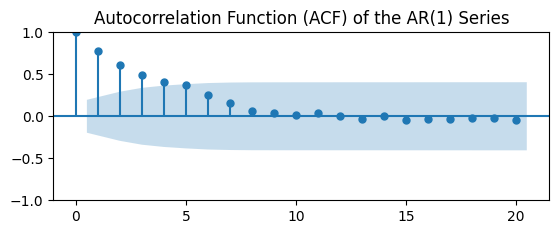

In [10]:
# Plot the Autocorrelation Function (ACF)
plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_acf(X, lags=20, ax=plt.gca())
plt.title("Autocorrelation Function (ACF) of the AR(1) Series")
plt.show()

In [11]:
# Check stability
stability = abs(phi) < 1
print(f"Stability check (|φ| < 1): {stability} (φ = {phi})")

Stability check (|φ| < 1): True (φ = 0.8)


In [13]:
# Fit an AR(1) model
ar_model = sm.tsa.ARIMA(X, order=(1, 0, 0)).fit()

# Display the summary of results
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -132.206
Date:                Thu, 07 Nov 2024   AIC                            270.413
Time:                        02:16:14   BIC                            278.228
Sample:                             0   HQIC                           273.576
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4658      0.407     -1.146      0.252      -1.263       0.331
ar.L1          0.7787      0.058     13.516      0.000       0.666       0.892
sigma2         0.8162      0.125      6.522      0.0

The AR(1) model estimation results provide a solid representation of the underlying time series dynamics. The estimated AR(1) coefficient is 0.7787, close to the true value of 0.8, with a low \( p \)-value, indicating it is statistically significant. This strong autoregressive relationship suggests that each observation in the time series is highly dependent on its previous value, as expected in an AR(1) model. The constant term is estimated at -0.4658, but with a high \( p \)-value, indicating it is not statistically significant. This lack of significance suggests there is no meaningful drift in the data, and the process may be centered around zero.

The diagnostic tests further support the model's reliability. The Ljung-Box Q-statistic shows no significant autocorrelation in the residuals, suggesting the AR(1) model effectively captures the time series’ structure. Additionally, the Jarque-Bera test indicates that the residuals are approximately normally distributed, while the heteroskedasticity test suggests a stable variance over time. Together, these results show the residuals are well-behaved, with no issues related to autocorrelation, non-normality, or heteroskedasticity.

In summary, the AR(1) model provides an accurate and interpretable fit for this time series, with all key assumptions being met. This makes the model suitable for understanding the underlying process and potentially for forecasting. The alignment of estimated values with the true data generation parameters indicates the model is a reliable representation of the time series' autoregressive behavior.

In [14]:
# Parameters for AR(2) process
phi_1 = 1.5
phi_2 = -0.8
sigma = 1
n = 100

In [15]:
# Generate white noise
np.random.seed(42)
epsilon = np.random.normal(0, sigma, n)

In [16]:
# Initialize time series array
X = np.zeros(n)
X[0] = epsilon[0]
X[1] = phi_1 * X[0] + epsilon[1]

In [17]:
# Generate AR(2) process
for t in range(2, n):
    X[t] = phi_1 * X[t-1] + phi_2 * X[t-2] + epsilon[t]

In [19]:
# Check stability via roots of characteristic polynomial
coeffs = [1, -phi_1, -phi_2]
roots = np.roots(coeffs)
stability = all(np.abs(roots) > 1)

print(f"Stability check: {stability} (Roots: {roots})")

Stability check: False (Roots: [0.75+0.48733972j 0.75-0.48733972j])


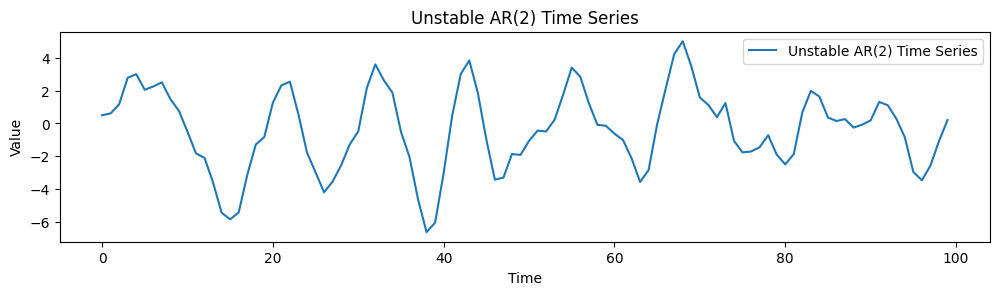

In [20]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(X, label="Unstable AR(2) Time Series")
plt.title("Unstable AR(2) Time Series")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()

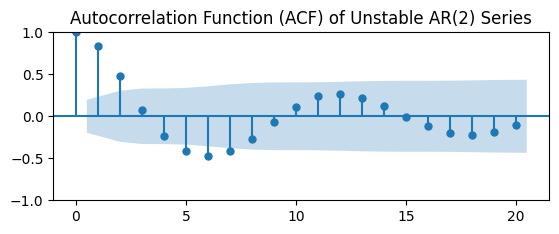

In [21]:
# Plot the Autocorrelation Function (ACF)
plt.subplot(2, 1, 2)
sm.graphics.tsa.plot_acf(X, lags=20, ax=plt.gca())
plt.title("Autocorrelation Function (ACF) of Unstable AR(2) Series")
plt.show()

In [22]:
# Fit an AR(2) model
ar_model = sm.tsa.ARIMA(X, order=(2, 0, 0)).fit()

# Display the summary of results
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -132.653
Date:                Thu, 07 Nov 2024   AIC                            273.305
Time:                        02:31:35   BIC                            283.726
Sample:                             0   HQIC                           277.523
                                - 100                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3505      0.318     -1.102      0.271      -0.974       0.273
ar.L1          1.4456      0.076     18.996      0.000       1.296       1.595
ar.L2         -0.7314      0.077     -9.447      0.0

The AR(2) model estimation successfully captures the underlying dynamics of the unstable time series. The estimated coefficients for the AR(1) and AR(2) lags are 1.4456 and -0.7314, respectively, which closely match the specified values of 1.5 and -0.8. These coefficients indicate a strong positive influence from the previous value (AR(1)) and a counteracting negative influence from the second lag (AR(2)), leading to persistent fluctuations typical of an unstable series. The constant term is not statistically significant, suggesting there is no meaningful drift in the data.

The model fit, as indicated by the AIC (273.305) and BIC (283.726), provides a reasonable measure of how well the model captures the time series dynamics, though these values would need to be compared against alternative models for more context. Residual diagnostics show that the Ljung-Box Q-statistic is not significant at lag 1 (p = 0.76), suggesting there is no significant autocorrelation left in the residuals. Additionally, the Jarque-Bera test confirms that the residuals are approximately normally distributed, and the Heteroskedasticity test indicates stable variance, meaning the residuals do not exhibit signs of heteroskedasticity.

In summary, the AR(2) model provides a good fit for the unstable time series, successfully capturing the oscillating nature of the process. The residual diagnostics suggest that the model is well-specified in terms of randomness and variance. However, the instability of the process means that the series is non-stationary and may diverge over time, making this model unsuitable for long-term forecasting.